In [1]:
! pip -q install tensorflow==2.0.0.alpha0
import tensorflow as tf
print(tf.__version__)

2.0.0-alpha0


In [0]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [3]:
data = fetch_california_housing()

X_train_full, X_test, Y_train_full, Y_test = train_test_split(data.data, data.target)

X_train, X_val, Y_train, Y_val = train_test_split(X_train_full, Y_train_full)

I0525 12:00:35.100299 140084428412800 california_housing.py:114] Downloading Cal. housing from https://ndownloader.figshare.com/files/5976036 to /root/scikit_learn_data


In [0]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [0]:
input = tf.keras.layers.Input(shape=X_train.shape[1:])
layer1 = tf.keras.layers.Dense(30, activation='relu')(input)
layer2 = tf.keras.layers.Dense(30, activation='relu')(layer1)
wide = tf.keras.layers.Concatenate(axis=1)([input, layer2])
outputs = tf.keras.layers.Dense(1)(wide)
model = tf.keras.models.Model(inputs=[input], outputs=[outputs])

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_27 (Dense)                (None, 30)           270         input_11[0][0]                   
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 30)           930         dense_27[0][0]                   
__________________________________________________________________________________________________
concatenate_8 (Concatenate)     (None, 38)           0           input_11[0][0]                   
                                                                 dense_28[0][0]               

In [0]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [46]:
from tensorflow.keras.callbacks import History
history = History()
model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_val, Y_val))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.3534 - val_loss: 32841.4460
Epoch 2/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3523 - val_loss: 33229.2370
Epoch 3/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3515 - val_loss: 31417.9914
Epoch 4/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3502 - val_loss: 32312.9589
Epoch 5/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3491 - val_loss: 29577.3071
Epoch 6/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3483 - val_loss: 30245.3324
Epoch 7/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.3472 - val_loss: 28715.9254
Epoch 8/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.3463 - val_loss: 27695.1289
Epoch 9/20
11610/11610 [==============================] - 0s 32

In [47]:
model.evaluate(X_test, Y_test)

5160/5160 [==============================] - 0s 17us/sample - loss: 0.3486


0.3485915804325148

### Subclassing the model

In [0]:
class MyModel(tf.keras.models.Model):
    def __init__(self, **kwargs):
        super(MyModel, self).__init__(**kwargs)
        self.hidden1 = tf.keras.layers.Dense(30, activation='relu')
        self.hidden2 = tf.keras.layers.Dense(30, activation='relu')
        self.concat = tf.keras.layers.Concatenate(axis=1)
        self.outputs = tf.keras.layers.Dense(1)
        
    def call(self, input):
        x = self.hidden1(input)
        x = self.hidden2(x)
        x = self.concat(axis=1)([input, x])
        return self.outputs(x)
        

In [61]:
model1 = MyModel()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_27 (Dense)                (None, 30)           270         input_11[0][0]                   
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 30)           930         dense_27[0][0]                   
__________________________________________________________________________________________________
concatenate_8 (Concatenate)     (None, 38)           0           input_11[0][0]                   
                                                                 dense_28[0][0]               

In [0]:
model1.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

In [63]:
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_val, Y_val))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3187 - val_loss: 25576.2378
Epoch 2/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3199 - val_loss: 26074.3055
Epoch 3/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3201 - val_loss: 21024.3528
Epoch 4/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3224 - val_loss: 29150.7188
Epoch 5/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3291 - val_loss: 25342.2093
Epoch 6/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3332 - val_loss: 54501.0323
Epoch 7/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.3453 - val_loss: 28549.4237
Epoch 8/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.3582 - val_loss: 38861.3811
Epoch 9/20
11610/11610 [==============================] - 0s 34

In [64]:
model.evaluate(X_test, Y_test)

5160/5160 [==============================] - 0s 17us/sample - loss: 0.3325


0.33247904897660246

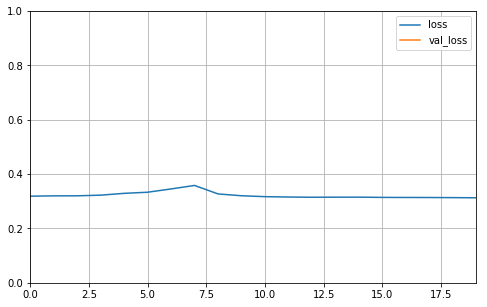

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()